# A2: Constrained Optimization

---

*Purpose*: Many engineering problems have constraints, whether those are the laws of physics, safety considerations, or legal requirements. Constraints greatly complicate optimization, both in the analysis of optimality conditions and in the practical design of algorithms. In this assignment you'll get some practice solving constrained optimization problems, and applying these tools to support *materials selection*.

*Learning Objectives*:
- use Pandas to work with data
- learn and apply the KKT conditions for constrained optimality
- use `gr.ev_min()` for constrained optimization problems
- use the KKT conditions to derive materials indices
- use materials indices to do materials selection

*Reading*:
- del Rosario and Iaccarino (2024), Ch. 5 - Data tools
- Kochenderfer and Wheeler (2019), Ch 10 - Constraints



### Assignment Checklist

1. [?] Make sure you have answered all questions. These are marked with a **qX.Y**
1. [?] Make sure you complete the Project Task at the end of the assignment. These will scaffold your project progress during the semester.
1. [?] Make sure your notebook passes all `assert()` statements. You will not get full credit for the assignment if a single `assert()` fails.
1. [?] Make sure your notebook runs: `Kernel > Restart kernel and run all cells...`
1. [?] Upload your notebook to Canvas.


### Grading Rubric

Every assignment is worth 10 points; it is not possible to receive less than 0 points. For each question (qX.Y) on a given assignment, the following grading rubric will be applied. For every NI that you receive, one point will be subtracted from your assignment total. For reference, to receive an A- in this class, you will need an average of 9 points across your 5 best assignments, meaning you need to have at most one mistake on your final submission for 5 assignments. To achieve this, you should take advantage of both the Draft and Final submission deadlines.

| Category     | Needs Improvement (NI)                     | Satisfactory (S)                       |
|--------------|--------------------------------------------|----------------------------------------|
| Effort       | qX.Y left unattempted                      | qX.Y attempted                         |
| Assertions   | Code does not pass an `assert()`           | All `assert()`s pass, or no assertions |
| Observations | Any point under *observe* left unattempted | All *observe*s attempted and correct,  |
|              | Provided an incorrect observation          | or no *observe*s for that q            |


## S1: Pandas DataFrames

---

[Pandas](https://pandas.pydata.org/) is a package for representing and analyzing `pan`el `da`ta; it provides a data structure called a *DataFrame*. Grama models are evaluated using DataFrames and return results in the form of a DataFrame, so we'll need to understand some pandas basics to work with Grama. (Plus pandas itself is a *super useful* package.)

*Aside*: A colleague of mine in industry once claimed that *the* reason to learn Python was so that one could use Pandas. I don't 100% agree with that reasoning, but it underscores how useful this library is!


In [2]:
import grama as gr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import scipy as sp
DF = gr.Intention()
%matplotlib inline

# Set figure options
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

The following code creates a *DataFrame* and prints it.


In [3]:
# NOTE: df_make() is a helper function provided by Grama
df_example = gr.df_make(
    x=[  1,   2,   3],
    y=[  4,   5,   6],
    c=["a", "b", "c"],
)

# NOTE: Simply writing a DataFrame at the end of a Jupyter cell
#       prints the DataFrame below the cell
df_example


,x,y,c
0,1,4,a
1,2,5,b
2,3,6,c


A DataFrame is a set of *rectangular* data; it has rows that represent observations, and columns that represent variables. Since Grama models take a DataFrame as input, you'll need to know how to create DataFrames to evaluate models.

### q1\.1 Create a DataFrame

Use `gr.df_make()` to create the following table:

| `x` | `y` |
|---|---|
| 1 | 0 |
| 1 | 1 |


In [4]:
###
# TASK: Create the DataFrame above
###

# TASK: 
df_q1_1 = gr.df_make(
    x = [1, 1],
    y = [0, 1]
)


# NOTE: No need to edit; this will check your answer
assert(df_q1_1.equals(pd.DataFrame(dict(x=[1, 1], y=[0, 1]))))
print("Success!")


Success!


We can load data from a file; the following code loads a CSV into memory.

In [5]:
# NOTE: No need to edit; this loads data
filename_aircraft = "wing_weight.csv"

df_aircraft = pd.read_csv(filename_aircraft)
df_aircraft


,Group,Name,Symbol,Units,Citation 500 Series,MDAT 30,MDAT 50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,9366.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,86300.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,71800.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,934.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,92.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,8.600,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,0.254,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,0.116,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,24.000,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


You can also use `df.to_csv(filename)` to write a DataFrame `df` to a target CSV with the name `filename`. This is helpful for storing and sharing results.

We can access individual columns with `.` notation:


In [6]:
# NOTE: No need to edit
#       dot (.) notation allows us to access a single column
df_aircraft.Group
# NOTE: You can also use ["column"] notation;
#       this is necessary for column names with spaces
# df_aircraft["MDAT 30"]


0     wing
1     wing
2     wing
3     wing
4     wing
5     wing
6     wing
7     wing
8     wing
9     wing
10    wing
11    tail
12    tail
13    tail
14    tail
15    tail
16    body
17    body
Name: Group, dtype: object

*Aside*: A pandas column is a a different data structure called a [series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

### q1\.2 Access a column

Access the `"MDAT 70"` column.


In [7]:
###
# TASK: Access the `MDAT 70` column
###

col = df_aircraft["MDAT 70"]


# NOTE: No need to edit; this will check your answer
assert(col.name == 'MDAT 70')
print("Success!")
col

Success!


0      5910.000
1     61000.000
2     49460.000
3       605.000
4       101.000
5         9.000
6         0.300
7         0.143
8         4.900
9         3.750
10     1188.000
11     1505.000
12      645.000
13      860.000
14      177.000
15      147.000
16     7118.000
17       70.000
Name: MDAT 70, dtype: float64

We can use column values to do a number of useful tasks, such as *filtering* the dataset based on logical matches. For instance, if we were looking for rows where the `Group` is that of the wing, the following would give us a boolean column where `True` corresponds to cases of a match.


In [8]:
# NOTE: No need to edit
#       Use == to test equality
df_aircraft["Group"] == "wing"

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: Group, dtype: bool

We can then use `gr.tf_filter()` to select only those rows that match the criteria:

*Note*: `DF` is the DataFrame pronoun, which refers to the data at stage in the pipeline. You should generally use `DF` (rather than the original variable name) when working with `gr.tf_*()` functions.


In [9]:
# NOTE: No need to edit
#       Filter the data for Group == "wing"
(
    df_aircraft
    >> gr.tf_filter(DF["Group"] == "wing")
)


,Group,Name,Symbol,Units,Citation 500 Series,MDAT 30,MDAT 50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,9366.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,86300.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,71800.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,934.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,92.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,8.600,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,0.254,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,0.116,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,24.000,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


To create a new column, we can use the `gr.tf_mutate()` function to specify how to compute the new column from old columns. For instance, we can do *math* on columns:

```python
df_new = (
    df_old
    >> gr.tf_mutate(
        z=DF["x"] + DF["y"]
    )
)
```

The DataFrame `df_new` will have a new column `z`.

### q1\.3 Create a new column

Create a new column named `g` that has the first letter of the `Group` column.

*Hint:* You can use the function `gr.str_sub(s, 0, 1)` to extract the first letter of a string `s`. This is a vectorized function---you just need to provide the correct argument using the proper `DF` syntax demonstrated in the example above.


In [10]:
###
# TASK: Create a new column named `g` that has the first letter of the `Group` column
###

df_newcol = (
    df_aircraft
    ## TODO: Add a gr.tf_mutate() with appropriate argument
    >> gr.tf_mutate(
        g = gr.str_sub(DF.Group, 0, 1)
    )

)

# NOTE: No need to edit; this checks your answer
assert "g" in df_newcol.columns, "No column named `g` found"
assert all(gr.str_sub(df_aircraft["Group"], 0, 1) == df_newcol["g"]), "New column does not contain correct values"
(
    df_newcol
    >> gr.tf_select("g", gr.everything())
)

,g,Group,Name,Symbol,Units,Citation 500 Series,MDAT 30,MDAT 50,F-28,MDAT 70,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,w,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,w,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,w,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,w,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,w,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,w,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,w,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,w,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,w,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,w,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


### q1\.4 Filter for matching units

Filter the DataFrame for only those rows that have `Units == "lbs"`.


In [11]:
###
# TASK: Filter the DataFrame to rows with Units == "lbs"
###

# TASK: Filter the DataFrame
df_filtered = (
    df_aircraft
    >> gr.tf_filter(DF.Units == "lbs")
)

# NOTE: No need to edit; this checks your answer
assert((df_filtered.Units == "lbs").all())
print("Success!")


Success!


Filtering a dataset and selecting columns helps us to create useful visualizations of data. For instance, the following code creates a plot of the weights of components on the "Citation 500 Series" aircraft.


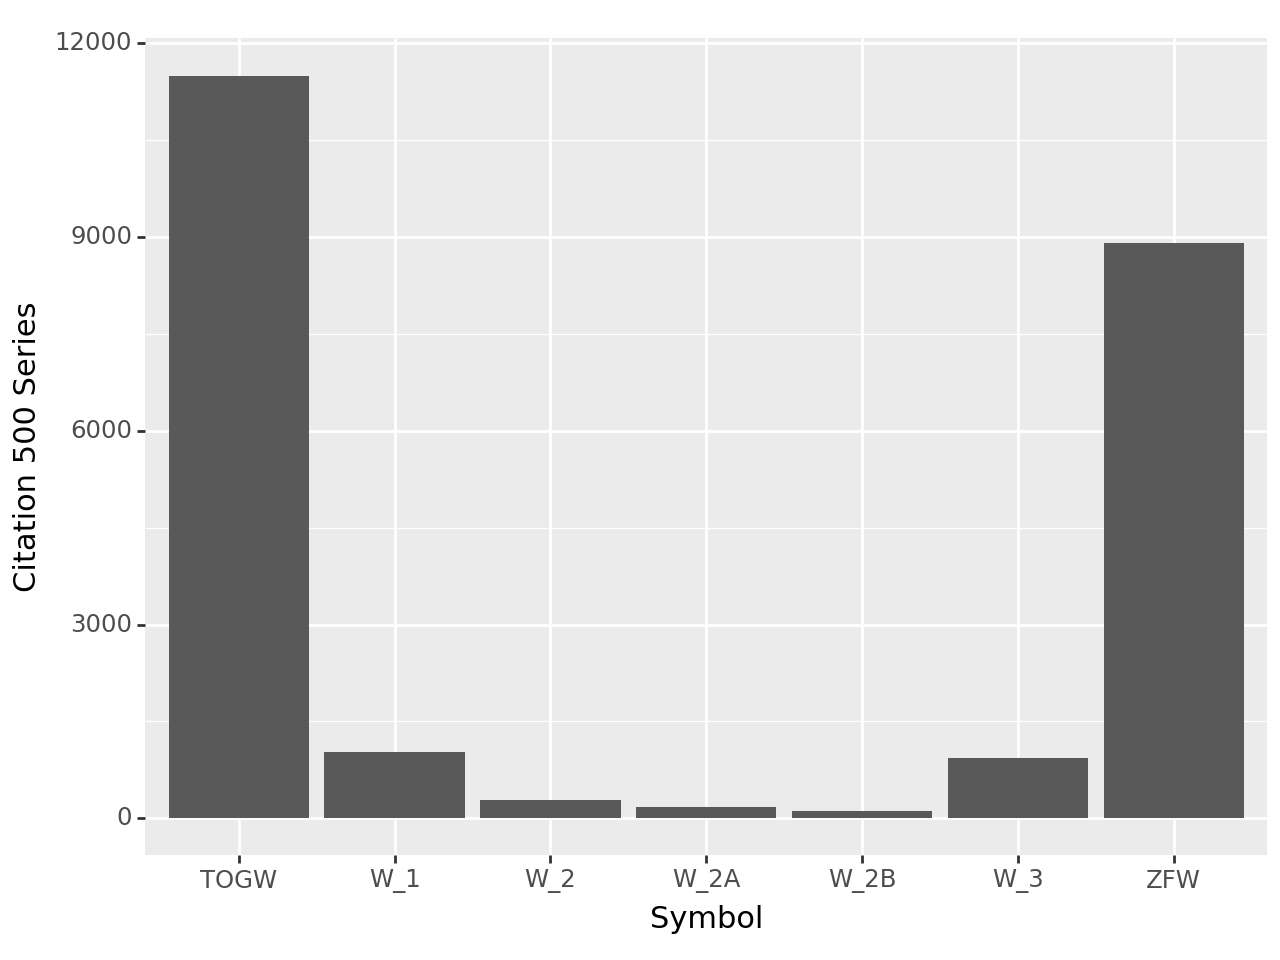

<Figure Size: (640 x 480)>

In [12]:
# NOTE: No need to edit; just some example code
(
    df_filtered
    >> gr.ggplot(gr.aes("Symbol", "Citation 500 Series"))
    + gr.geom_col()
)


When column names are difficult to work with, we can use `gr.tf_rename()` to provide more convenient column names.


In [13]:
# NOTE: No need to edit; run and inspect
(
    df_aircraft
    >> gr.tf_rename(
        citation="Citation 500 Series",
        mdat30="MDAT 30",
        mdat50="MDAT 50",
    )
)


,Group,Name,Symbol,Units,citation,mdat30,mdat50,F-28,MDAT 70,DC-9-10,...,DC-10-40,747,SCAT-15,C-130A,C130E,KC-135A,C-133B,C-141A,C-5A,AST
0,wing,wing_system_weight,W_1,lbs,1020.000,3143.000,4360.000,7526.000,5910.000,9366.000,...,57748.000,88741.000,83940.000,10593.000,11647.000,24719.000,27064.000,34262.000,81782.000,20560.0
1,wing,takeoff_gross,TOGW,lbs,11500.000,34480.000,46850.000,62000.000,61000.000,86300.000,...,565000.000,775000.000,631000.000,108000.000,155000.000,275000.000,286000.000,316100.000,728000.000,163500.0
2,wing,zero_fuel_weight,ZFW,lbs,8900.000,27450.000,37760.000,47600.000,49460.000,71800.000,...,391000.000,526500.000,364550.000,87290.000,107890.000,190380.000,215000.000,204500.000,542800.000,143000.0
3,wing,trap_area,S_W,sq_ft,269.000,342.000,464.000,822.000,605.000,934.000,...,3610.000,4960.000,10744.000,1808.000,1808.000,2453.000,2673.000,3000.000,6200.000,1890.0
4,wing,wing_loading,W/S,lb/sq_ft,43.000,101.000,101.000,75.000,101.000,92.000,...,157.000,156.000,59.000,60.000,86.000,112.000,107.000,105.000,117.000,87.0
5,wing,aspect_ratio,AR,-,7.100,9.000,9.000,7.270,9.000,8.600,...,7.200,7.700,1.600,9.700,9.700,7.000,12.100,8.500,7.700,7.0
6,wing,taper_ratio,lambda,-,0.390,0.300,0.300,0.361,0.300,0.254,...,0.273,0.356,0.096,0.440,0.440,0.331,0.226,0.335,0.338,0.3
7,wing,average_t_to_c,t/c,-,0.123,0.143,0.143,0.129,0.143,0.116,...,0.112,0.122,0.029,0.147,0.147,0.148,0.163,0.121,0.119,0.1
8,wing,sweep_ang_qt_chord,Omega C/4,degrees,1.400,4.900,4.900,16.000,4.900,24.000,...,35.000,37.500,0.000,0.000,0.000,35.000,0.000,25.000,24.500,25.0
9,wing,ultimate_load_factor,U,-,6.300,3.750,3.750,5.140,3.750,3.750,...,3.750,3.750,3.750,4.500,3.750,3.000,3.750,3.750,3.750,5.1


One last note on working with DataFrames: Grama makes heavy use of DataFrames internally, so if you're willing to work in this datatype you can make your code much more efficient. Namely, if your model functions are simple analytic expressions, you can benefit from *vectorizing* your functions. You can do so with the following recipe:

In [14]:
## NOTE: No need to edit; example vectorized function
md_vec = (
    gr.Model()
    # vec_function signals that we're going to provide 
    # a vectorized function
    >> gr.cp_vec_function(
        # Our function needs to both take and return a DataFrame;
        # gr.df_make() is a helper to compactly create a DataFrame
        fun=lambda df: gr.df_make(
            # We can access the variables of the DataFrame provided
            # as an input
            f=df.x + df.y
        ),
        # We still need to specify the inputs, because Grama can't
        # read this information from the lambda function provided
        var=["x", "y"],
        # Ditto for the outputs
        out=["f"],
    )
)

Ok! That's enough pandas for now.


## S2: Tenchi Diagrams and Constraints

---

The elements of a tenchi diagram are designed to help us understand our model: what it means *and* how we aim to use it. We're going to practice using a tenchi diagram to understanding *constraints*, particularly where they come from.

### Constraints from assumptions about physics

First, constraints can come from the assumptions we make about a system to build our model. Figure 2 depicts an example where we are attempting to determine the height above the ground for a mass suspended by two cables. We'll build a simple model by assuming the cables are perfectly straight: This is a crude assumption (cables form a [catenary](https://en.wikipedia.org/wiki/Catenary) shape), but it will be reasonably accurate if the mass is much heavier than the cables. Notice that our assumption of straight cables gets encoded in math (Fig. 1, top *Mathland* panel) as equality constraints.

<img src="./images/tenchi-hanging.png" width="400">

**Figure 1.** Tenchi diagram of a model for a mass suspended by two cables.

Constraints do not only come from assumptions about physics. We can also make assumptions (and enforce them as constraints) for *convenience*.

### Constraints of convenience

As we saw in the previous notebook (nb1), *local minima* can make optimization challenging. Another way to make our optimization more well-behaved is to introduce constraints for *convenience*. These constraints are not based on physics, nor on stakeholder requirements. Instead, we can introduce reasonable constraints to make our optimization problem easier to solve---hence, more convenient.

For example, let's return to the baseball example. If our usage is to maximize distance, then we're not really interested in what happens to ball if we hit it in an unproductive direction. We can represent this intuition about the scenario by introducing a constraint on the initial angle of the ball $\theta$. In Figure 2 I write out an optimization problem with a *reasonable* constraint $0\leq\theta\leq\pi/2$.

<img src="images/tenchi-baseballangle.png" width="400">

**Figure 2.** Tenchi diagram of a model for a baseball trajectory. 

Our usage is to figure out how to maximize the distance the ball travels before hitting the ground. To that end, I put a *reasonable* constraint on $\theta$ to restrict attention to directions of interest. This is not a physical constraint; instead, it's based on physical intuition. Hitting the ball backwards ($\theta > \pi/2$) or into the ground ($\theta < 0$) will clearly not help us maximize distance. With this constraint, an optimization algorithm will have an easier time finding the actual maximizer.


### q2\.1 Analyze constraints

Study the following tenchi diagram and answer the following questions.

*Hint*: I'm assuming you know a playground swing works, but if you need a refresher---or if you've never thought about the physics behind it---you should watch [this video](https://www.youtube.com/watch?v=BKjZVFEKfMk). In particular, you need to know how your center of mass behaves when pumping your core and legs.

<img src="images/tenchi-swing.png" width="400">

**Figure 3.** Tenchi diagram of a crude model for a person swinging.


*Observe*: Answer the following questions about particular constraints in the mathematical model depicted in Figure 3.

$m\frac{d^2\vec{x}}{dt^2} = \vec{F}_g + \vec{F}_t$

where

  $m$ is the mass of the body (person, represented as an infinitely-small point)

  $\vec{x}(t)$ is the position of the body, which changes over time

  $\vec{F}_g$ is the force due to gravity

  $\vec{F}_t$ is the force due to tension in the swing cable

- In your own words, what does this constraint represent?
  - This constraint is a physics constraint that the person's acceleration must be a function of Fg and Ft, scaled by the mass of the person. It only represents the swing's "steady state", "ideal" movement, not accounting for drag/air resistance.
- Can this mathematical model account for the "pumping" motion that leads to swinging? Why or why not?
  - No.
  - This model does not account for the pumping motion that the person does; it only accounts for the acceleration of the person once they are already in a pendulum-like motion. It assumes the person is a point mass, and does not account for the movement of the person's mass that causes the "pumping" motions.

$\|\vec{x} - \vec{0}\|_2 = l$

where $\vec{0} = [0, 0]^{\top}$ is the zero vector, and $l$ is a constant length.

- In your own words, what does this constraint represent?
  - This is a physics constraint that says that the person (location at $\vec{x}(t)$) must always be a distance l away from the pivot.
- Imagine you are on a swing and you go high enough that the swing cable goes slack; that is, the cable bends a bit, and you get closer to the pivot point than full extension. Can this model represent that scenario? Why or why not?
  - No.
  - The constraint on this model is that the person's location must always be distance 'l' away from the pivot point. So no, it would not be able to represent a scenario where this constraint is not met.

Imagine we added a constraint $-\pi/2 \leq \theta \leq +\pi/2$. Would this be a constraint from assumptions about physics, or a constraint of convenience? Why?

*Hint*: Is there any physical reason we can't swing above the bar?
  - This is a constraint we could put in play for our own convenience.
  - There isn't anything physically preventing someone from swinging above the bar. However, it is reasonable to assume that someone probably wouldn't be trying to (a) swing so high up and (b) that the other constraints would be met if they swung up this high. 

Imagine you sat on a swing and started pumping. Then you *stop moving your body* and just let the swing rock back and forth. Would this be a reasonable model for once you stop moving your body? Why or why not?
  - Yes, this is reasonable.
  - Once you stop pumping (adding energy to the system), you enter the steady-state swinging motion that is modeled by the presented equations (assuming, of course, no drag forces).


## S3: The KKT Conditions

---

The [Karush-Kuhn-Tucker](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) (KKT) conditions are a set of tests to check if a point $x$ in the domain of a **constrained** optimization problem could be optimal. KKT plays the same role as the FONC for unconstrained problems.

For simple optimization problems we can use the KKT conditions to find a critical value, but note that we still need to *check* if that value is an maximum or a minimum. Even when we can't apply KKT directly, these conditions help us *organize our thinking* about constrained optimization problems.

The KKT conditions apply to a *generic* constrained optimization problem in *standard form*:

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, g_i(x) \leq 0$$
$$\text{s.t.}\, h_j(x) = 0$$

Thus the KKT conditions simultaneously consider an objective function $f$ and any number of inequality $g_i \leq 0$ and equality $h_j = 0$ constraints.

Before going straight to the full KKT conditions, let's build some intuition for equality and inequality constraints separately.


### Equality Constraints

An equality constraint *severely* restricts the domain of our optimization problem. An equality constraint will tend to 

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, x + y = 2$$

First, we should translate this into *standard form*:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, h(x, y) \equiv x + y - 2 = 0$$


### q3\.1 Interpret constrained optimization result

The following code visualizes the constrained optimization problem above; run the code, study the figure, and answer the questions below.


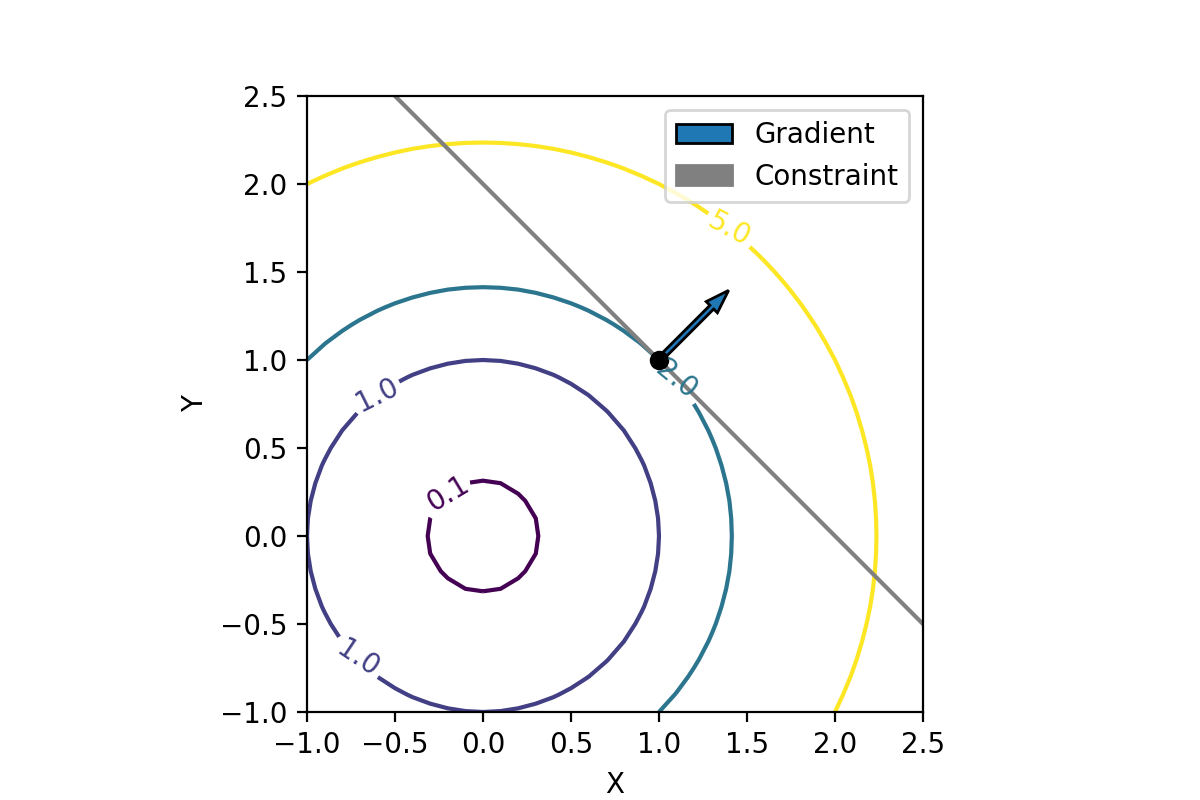

In [15]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.plot(x, y_line, color="gray")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)
a_grad = plt.arrow(
    x_s[0], # x base
    x_s[1], # y base
    g_s[0], # dx
    g_s[1], # dy
    width=0.03,
)

# Use proxy artists for legend
a_con = mpatches.Patch(color='gray', label='Constraint')

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.legend([a_grad, a_con], ["Gradient", "Constraint"], loc=0)


Note that the gray line above depicts the set of points where $h(x, y) = 0$.

*Observe*:

- Roughly, where would the *unconstrained* minimum of the objective function lie?
  - 0, 0
- Roughly, where does the *constrained* minimum of the optimization problem lie?
  - 1.0, 1.0
- What value does the constraint take at the constrained optimum, $h(x^*) = ?$
  - $h(x^*) = x + y - 2 = 0$, so, $h(x^*) = 1 + 1 - 2 = 0$
- What is the relationship between the gradient of the objective $\nabla_x f(x^*)$ and the gradient of the constraint $\nabla_x h(x^*)$ *at the constrained minimizer* $x^*$? How do you represent this relationship as an *equation*?
  - At the contstrained minimizer, the gradients of the objective function and the constraint are parallel to each other. If the gradient of the constraint was not perpendicular to the equation of the constraint, there would be more minimization that could be done.
  - $\nabla_x f(x^*) = \lambda\nabla_x h(x^*)$
  - *Hint*: The Kochenderfer and Wheeler reading covers this!


### The Lagrangian

On our way to the KKT conditions we can first consider *lagrange's method*, which considers equality constraints only. The *lagrangian* for an equality-constrained optimization problem is

$$L(x, \lambda) = f(x) - \lambda h(x).$$

where $\lambda$ is a new variable known as a *lagrange multiplier*. Note that $\nabla L(x, \lambda)$ is the gradient of $L$ with respect to **all** of its arguments, that is $\nabla L = [\nabla_x L, \nabla_{\lambda} L]$. Thus, if we set $\nabla L = 0$, this is equivalent to setting $\nabla_x f - \lambda \nabla_x h = 0$ and $h(x) = 0$. Solving both of these equations will give a critical point of the equality-constrained optimization problem.

Essentially, lagrange's method turns an equality-constrained optimization problem into an *unconstrained* problem:

$$\min\, L(x, \lambda)$$
$$\text{wrt.}\, x, \lambda$$

Critical points of this new unconstrained optimization problem will be critical points of our original equality-constrained optimization problem.

For multiple equality constraints, we can formulate a lagrangian incorporating each equality:

$$L(x, \lambda_1, \dots, \lambda_m) = f(x) - \sum_{j=1}^m \lambda_j h_j(x).$$

## Aside: Feasibility

Once we start adding multiple constraints, it's very easy to construct optimization problems where one cannot satisfy all constraints simultaneously. An optimization problem where all constraints cannot be satisfied is said to be *infeasible*.

The following code demonstrates one such example with the equality constraints $h_1 \equiv x + y - 2 = 0$ and $h_2 \equiv x + y - 1.5 = 0$.


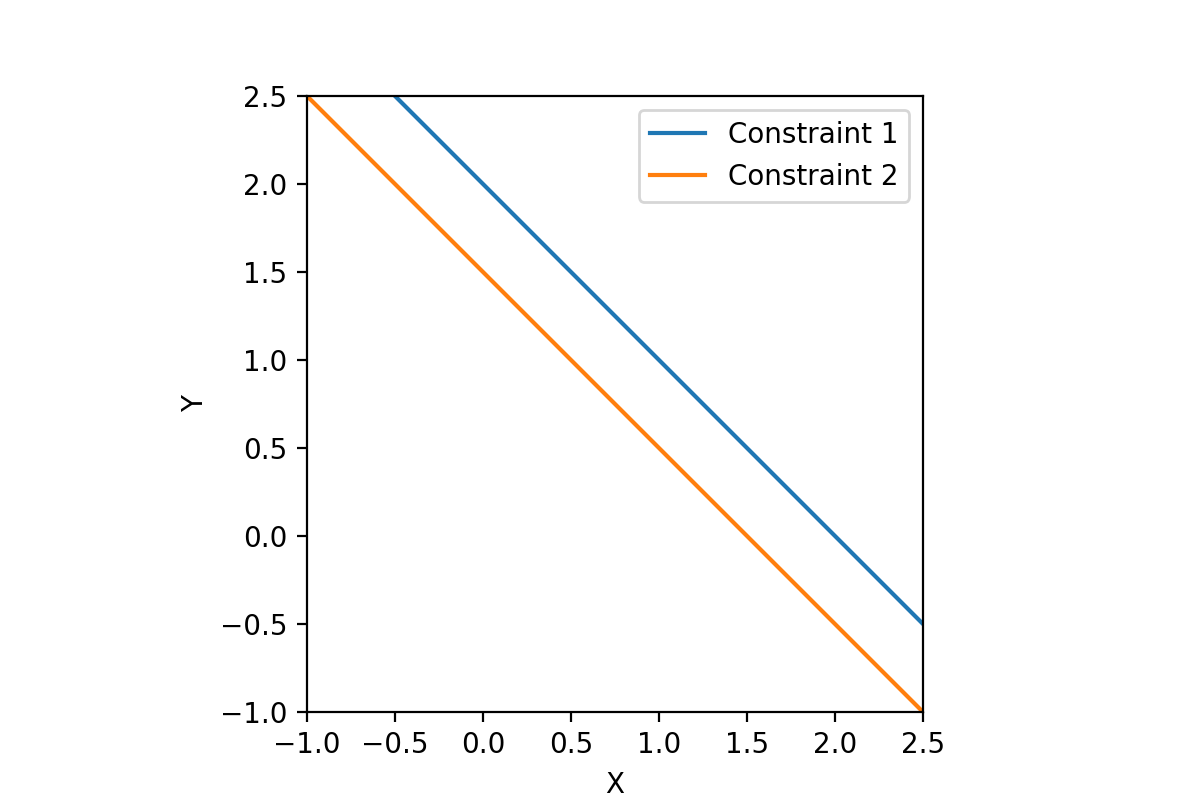

In [17]:
# NOTE: No need to edit, run and inspect
# Constraint, as line
fun_line1 = lambda x: -x + 2
fun_line2 = lambda x: -x + 1.5

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
# Constraint data
y_line1 = list(map(fun_line1, x))
y_line2 = list(map(fun_line2, x))
        
# Create contour plot
fig, ax = plt.subplots()
plt.plot(x, y_line1, label="Constraint 1")
plt.plot(x, y_line2, label="Constraint 2")

# Plot tail
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.legend(loc=0)


Clearly, these two parallel lines will never intersect, so there is no way to satisfy both constraints at the same time. Therefore we should be cautious when adding equality constraints to a problem: We can easily make the problem infeasible!


## Inequality Constraints

Equality constraints are conceptually simple to apply; they *must* be true for the optimization to be satisfied. However *inequality* constraints allow for a great deal more complexity.

For instance, the following visualizes the previous "bowl" optimization problem, but with an inequality constraint instead:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, g(x, y) \equiv -(x + y - 2) \leq 0$$


Text(0.5, 1.0, 'Minimizer unchanged, constraint active')

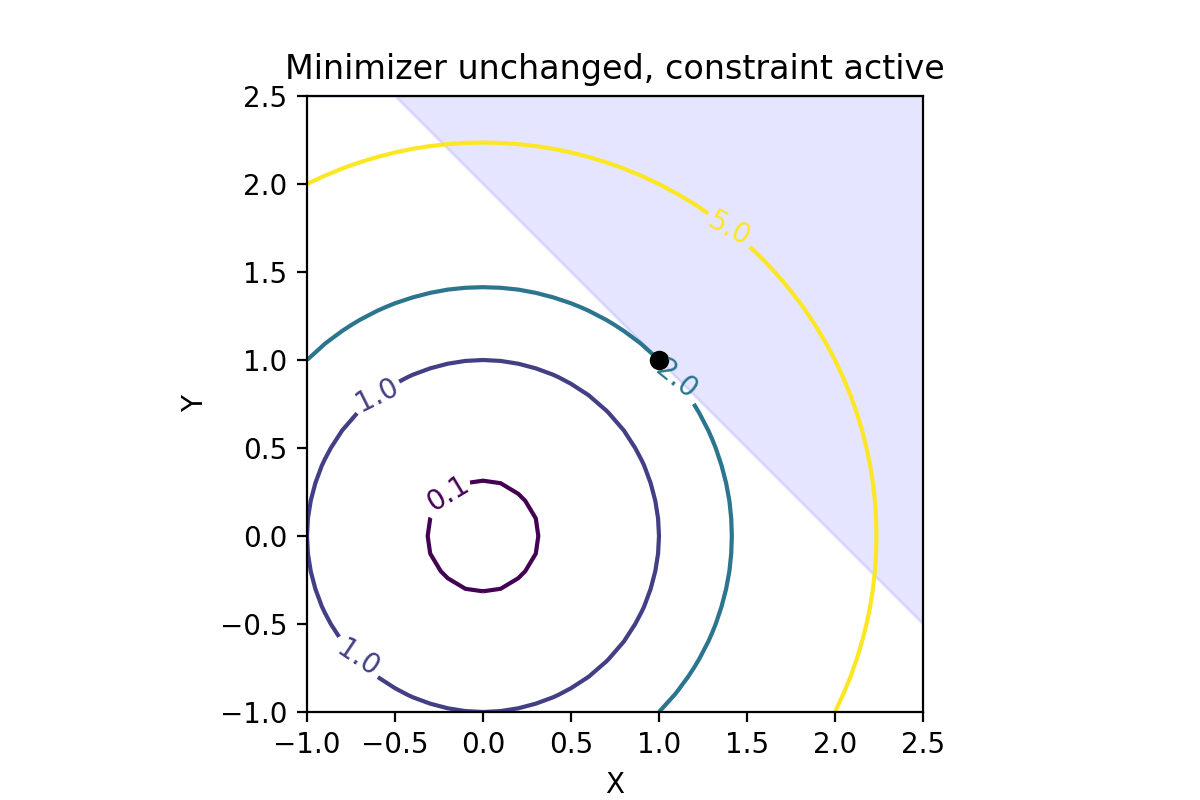

In [18]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x + 2

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([1, 1])
g_s = grad_bowl(x_s) * 0.3
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_line, 2.5, color="blue", alpha=0.1)
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.title("Minimizer unchanged, constraint active")


The shaded region depicts the *feasible region* of the optimization problem---the set of points that satisfy the constraints. Note that in this example, the minimizer is in the same location it was when the constraint was an equality.

In the case above, the inequality constraint is said to be **active**. This occurs when equality is met, that is $g(x^*) = 0$.

The next version of the same problem has a very different result:


Text(0.5, 1.0, 'Minimizer changed, constraint inactive')

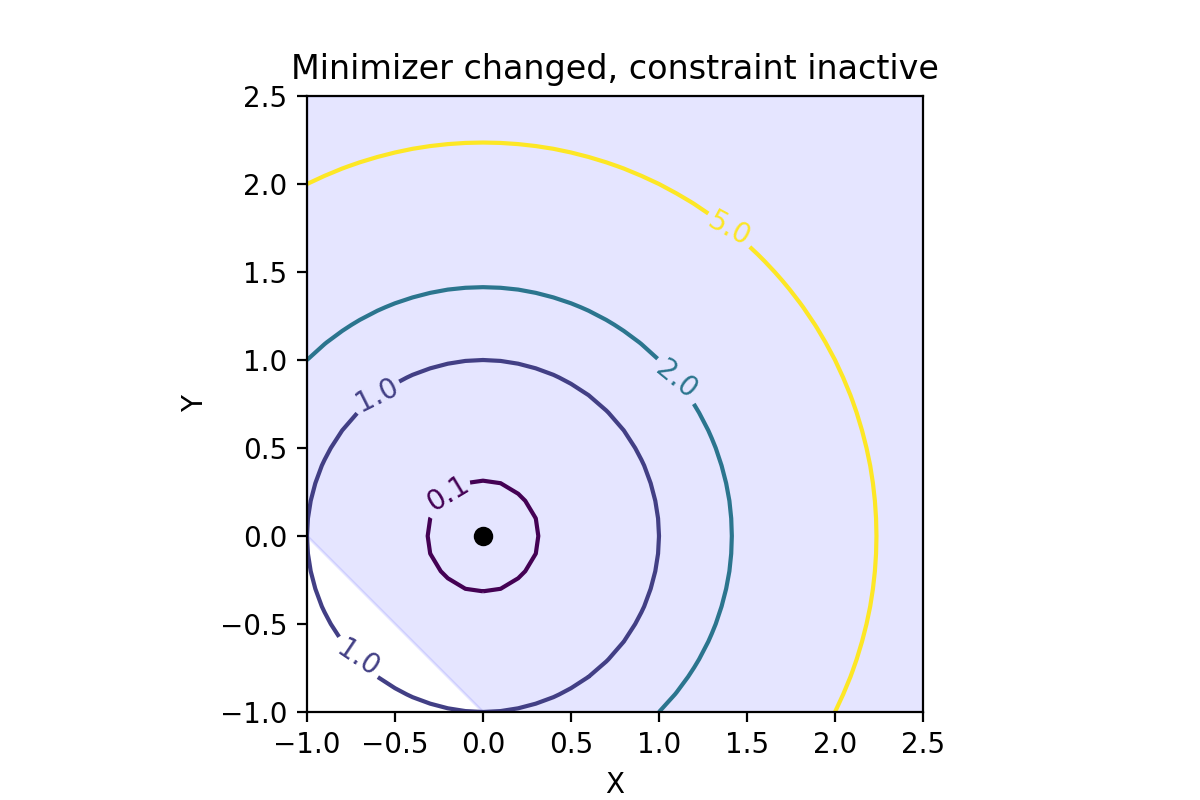

In [19]:
# NOTE: No need to edit, run and inspect
# Objective function
fun_bowl = lambda X: X[0]**2 + X[1]**2
# Gradient
grad_bowl = lambda X: np.array([X[0], X[1]])
# Constraint, as line
fun_line = lambda x: -x - 1

# Contour data
delta = 0.1
x = np.arange(-1, +3, delta)
y = np.arange(-1, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line = list(map(fun_line, x))
# Gradient data
x_s = np.array([0, 0])
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_line, 2.5, color="blue", alpha=0.1)
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.0, +2.5))
plt.ylim((-1.0, +2.5))
ax.set_aspect(aspect=1)
plt.title("Minimizer changed, constraint inactive")


Here the minimizer does not lie along the constraint; instead, it is in the interior of the feasible region. In this case the inequality does not affect the optimum value of the optimization problem.

In the case above, the inequality constraint is said to be **inactive**. This occurs when the inequality is strict $g(x^*) < 0$.


### q3\.2 Optimize with constraints

The following figure depicts the optimization problem:

$$\min\, f(x, y) = x^2 + y^2$$
$$\text{wrt.}\, x, y$$
$$\text{s.t.}\, g_1 = -(x + y + 1) \leq 0$$
$$\text{s.t.}\, g_2 = -(-x + y -\sqrt{2/10}) \leq 0$$

Use `gr.ev_min()` to solve this *constrained* optimization problem.

*Hint*: `gr.ev_min()` allows you to specify either a greater-than or a less-than inequality. Make sure to consult the documentation to learn how to do this!


Estimated runtime: 0.0000 sec
x_s = 
x   -0.5
y   -0.5
Name: 0, dtype: object



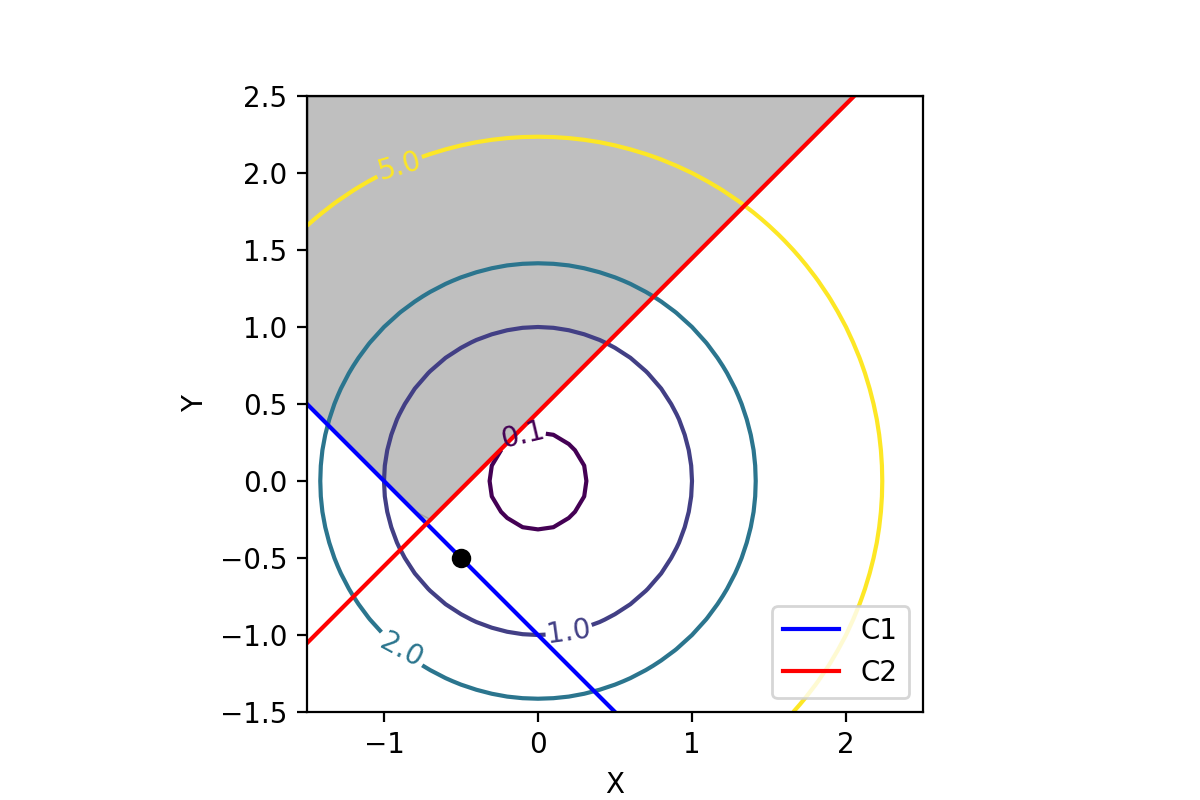

In [ ]:
###
# TASK: Solve the constrained optimization problem
#       with gr.ev_min()
###

# NOTE: No need to edit, this sets up the optimization problem
# Objective function
var_bowl = ["x", "y"]
md_bowl = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(f=df.x**2 + df.y**2),
        var=var_bowl,
        out=["f"],
    )
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(c1=-(+df.x + df.y + 1)),
        var=var_bowl,
        out=["c1"],
    )
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(c2=-(-df.x + df.y - np.sqrt(2/10))),
        var=var_bowl,
        out=["c2"],
    )
    >> gr.cp_bounds(
        x=(-1, +2),
        y=(-2, +2),
    )
)

# TASK: Solve the constrained optimization problem with gr.ev_min()
df_bowl = (
    md_bowl
    >> gr.ev_min(
        out_min="f",
        out_geq=["c1", "c2"]
        )
)
# x_s = res.x <- I don't actually know what this is supposed to do, something from scipy?

# NOTE: No need to edit below; this visualizes your results
# Constraints, as line
x_s = df_bowl.iloc[0][["x", "y"]]
print("x_s = \n{}\n".format(x_s))
fun_line1 = lambda x: -x - 1
fun_line2 = lambda x: +x + np.sqrt(2 / 10)
# Contour data
delta = 0.1
x = np.arange(-1.5, +3, delta)
y = np.arange(-1.5, +3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = fun_bowl([X[i, j], Y[i, j]])
# Constraint data
y_line1 = list(map(fun_line1, x))
y_line2 = list(map(fun_line2, x))
y_comb = list(map(np.max, zip(y_line1, y_line2)))
        
# Create contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=[0.1, 1.0, 2.0, 5.0])
plt.fill_between(x, y_comb, 2.5, color="gray", alpha=0.5)
plt.plot(x, y_line1, color="blue", label="C1")
plt.plot(x, y_line2, color="red", label="C2")
plt.plot(x_s[0], x_s[1], "k.", markersize=12)

# Plot tail
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim((-1.5, +2.5))
plt.ylim((-1.5, +2.5))
ax.set_aspect(aspect=1)
plt.legend(loc=0)


*Observe*:

- Where does the optimal value lie for this inequality-constrained optimization problem?
  - The optimal value is at x* = -0.5000000015306231, y* = -0.49999999846937704.
- Which constraints (among C1, C2) are **active** in this problem?
  - C1 is an active constraint.
- Which constraints (among C1, C2) are **inactive** in this problem?
  - C2 is an inactive constraint.


This option for inequality constraints to be either active $g(x^*) = 0$ or inactive $g(x^*) < 0$ complicates the conditions for optimality; we have to account for the possibility of an active or inactive constraint. It is this complexity that gives rise to the *Karush-Kuhn-Tucker* conditions.

## Karush-Kuhn-Tucker (KKT) Conditions

For a general minimization problem

$$\min\, f(x)$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, g_i(x) \leq 0$$
$$\text{s.t.}\, h_j(x) = 0,$$

construct the lagrangian

$$L(x, \lambda, \mu) = f(x) + \sum_{i=1}^m \mu_i g_i(x) + \sum_{j=1}^l \lambda_j h_j(x),$$

where $x$ are called the *primal variables* and $\mu, \lambda$ are called the *dual variables*.

With the KKT conditions, we seek values for $x^*, \mu^*, \lambda^*$ that satisfy four conditions:

1. Stationarity

$$\nabla_x L(x^*, \mu^*, \lambda^*) = 0$$

This condition requires alignment of the objective gradient with *select* terms in the lagrangian.

2. Primal Feasibility

$$g_i(x^*) \leq 0\text{, for }i=1,\dots,m$$

$$h_j(x^*) = 0\text{, for }j=1,\dots,l$$

This is the "ordinary" feasibility of the problem; satisfaction of all constraints.

3. Dual Feasibility

$$\mu_i^* \geq 0\text{, for }i=1,\dots,m$$

This is an additional feasibility condition, added to deal with the complexity of active/inactive constraints. It is formulated in terms of the *dual variables* $\mu$.

4. Complementary Slackness

$$\mu_i^* g_i(x^*) = 0\text{, for }i=1,\dots,m$$

This is a neat mathematical trick for expressing the (in)activity of an inequality constraint; either $\mu_i$ or $g_i$ must be zero for this expression to hold (for all $i$).
- If $g_i(x^*) = 0$ then the i-th constraint is active; the term $\mu_i^* g_i(x^*)$ **does contribute** to the stationarity condition $\nabla_x L = 0$.
- If $\mu_i^* = 0$ then the i-th constraint is inactive; the term $\mu_i^* g_i(x^*)$ **does not contribute** to the stationarity condition $\nabla_x L = 0$.


## Applying KKT

The KKT conditions are not an algorithm so much as a way to organize information about an optimization problem. To illustrate how this works, let's take a look at the following optimization problem:

$$\min\, f = x^2$$
$$\text{wrt.}\, x$$
$$\text{s.t.}\, 0 \leq x$$
$$\text{s.t.}\, k \leq x$$

where $k$ is a constant satisfying $k > 0$.


### q3\.3 Translate into standard form

Translate this optimization problem into standard form.

Standard form for inequality constraints: $g_i(x) \leq 0$

Constaint 1: $\text{s.t.}\, 0 \leq x$ -----> $\text{s.t.}\, -x \leq 0$

Constraint 2: $\text{s.t.}\, k \leq x$ ----> $\text{s.t.}\, k - x \leq 0$

### q3\.4 Write down the KKT conditions

$$L(x, \lambda, \mu) = x^2 + \mu_2 k - (\mu_1 + \mu_2)x$$




Derive the lagrangian for the problem, and write down the KKT conditions for this standard optimization problem.

*Hint*: The KKT conditions for this problem should include three equalities and four inequalities.

Equalities:

- (1) From stationary condition: $dL/dx = 2x - \mu_1 - \mu_2$
- (4) From complementary slackness: $\mu_1(-x) = 0$
- (4) From complementary slackness: $\mu_2(k-x) = 0$

Inequalities:

- (2) From primal feasibility (c1): $(g_1) -x \leq 0$
- (2) From primal feasibility (c2): $(g_2) k-x \leq 0$
- (3) From dual feasibility: $\mu_1 \geq 0$
- (3) From dual feasibility: $\mu_2 \geq 0$





### q3\.5 Check slackness scenarios

Using the KKT conditions, determine which of the following scenarios are possible:

Fill in this table

| Scenario | Possible? | Why |
|----------|-----------|-----|
| $g_1=0, g_2=0$ | No | k must be greater than 0, but this sets k = 0 |
| $g_1=0, \mu_2=0$ | No | k must be greater than 0, but this requires k <= x |
| $\mu_1=0, g_2=0$ | Yes! | All conditions are met, and you end up with 2k = $\mu_2$, which works because k > 0, allowing $\mu_2$ to be above zero as required by $g_2$ being 0. |
| $\mu_1=0, \mu_2=0$ | No | This requires k <= x, while k > 0, which cannot be true it 2x = 0. |



### q3\.6 Solve the optimization problem

In q2.5 you should have found only one possible scenario. Solve the optimization by using that slackness scenario. Report the minimizer $x^*, \mu_1^*, \mu_2^*$ and minimum $f^*$.

$x^* = k$

$\mu_1^* = 0$

$\mu_2^* = 2k$

$f^* = k^2$

*Aside*: Technically, you also need to check that your optimum is actually a minimum (rather than a maximum!) by applying the [Second-order sufficient conditions](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions#Second-order_sufficient_conditions). It turns out this problem has only one critical point, and that is the minimum.


## S4: Case Study: Materials Selection

---

[Material selection](https://en.wikipedia.org/wiki/Material_selection) is a key part of engineering design. Selecting a material affects things like the performance of a system and how it will be manufactured. One of the factors we consider in material selection is a quantitative index of performance called the *material index*.

You might be familiar with the strength-to-weight ratio $I_{\text{Tie, Strength}} = \sigma_y / \rho$ of a material, described by the material strength $\sigma_y$ and its density $\rho$. It turns out this is the governing property only for *certain loading conditions*; the form of $I_{\text{Tie, Strength}}$ given above is for a [tie](https://en.wikipedia.org/wiki/Tie_(engineering)) (a straight member in tension). The strength-to-weight ratio is actually derived from an optimization problem:

$$\min\, m = \rho L A$$
$$\text{wrt.}\, A$$
$$\text{s.t.}\, P/A \leq \sigma_y$$
$$\text{s.t.}\, 0 \leq A$$

That is, the minimum-mass tie, optimizing over cross-sectional area $A$, constrained by its strength. Solving this optimization problem yields $m_{\text{Tie, Strength}}^* = \rho L P / \sigma_y$. Note that if we re-arrange the terms in this optimum value, we can write

$$m_{\text{Tie, Strength}}^* = \left(\frac{\rho}{\sigma_y}\right) \left(LP\right)$$

We can then minimize the mass by selecting a material to minimize the quantity $\rho / \sigma_y$; the remaining terms in $m_{\text{Tie, Strength}}^*$ are geometric and loading factors. It is conventional to invert this factor so that maximizing the resulting *material index* yields the minimum-mass tie. Thus the material index for the tie problem

$$I_{\text{Tie, Strength}} = \frac{\sigma_y}{\rho}$$

is a performance indicator where a larger $I_{\text{Tie, Strength}}$ corresponds to a higher-performing material. 

Note that changing the structural element, the objective, *or the optimization variable* will tend to change the form of the material index, as you'll see below!


## A Different Use Case

In this case study, you will derive and apply a material index for a minimum-mass, strength-constrained cantilever beam. The optimization problem is defined by:

$$\min\, m = \rho L t^2$$
$$\text{wrt.}\, t$$
$$\text{s.t.}\, 6\frac{FL}{t^3} \leq \sigma_y$$
$$\text{s.t.}\, 0 \leq t$$

where

| Symb. | Meaning |
|---|---|
| $m$ | Mass |
| $L$ | Length |
| $t$ | Thickness |
| $F$ | Applied load |
| $\sigma_y$ | Strength |
| $\rho$ | Density |


### q4\.1 Solve for the minimum mass with the KKT conditions

Apply the KKT conditions to solve for the minimum-mass beam; separate the terms $\rho, \sigma_y$ into their own separate factor.

$\mu_1 = \frac{\rho}{9F}\left(\frac{6FL}{\sigma_y}\right)^{5/3}$

$m^* = \frac{\rho}{(\sigma_y^{2/3})}/ (L)(6FL)^{2/3}$

$t^* = \left(\frac{6FL}{\sigma_y}\right)^{1/3}$


*Hint*: The KKT exercise we did above will be helpful here!

*Note*: You'll get a chance to check your solution in q3.2 below.


### q4\.2 Formulate the beam-strength index

Isolate the material factors $\rho, \sigma_y$ and take their inverse to define the beam-strength index $I_{\text{beam, strength}}$. Implement this expression in a Grama model.

$$I_{\text{beam, strength}} = \frac{(\sigma_y^{2/3})}{\rho}$$


In [33]:
###
# TASK: Implement the beam-strength index
###

# NOTE: No need to edit; use these variable names
var_index = ["rho", "sigma_y"]
out_index = ["I_beam"]


# TASK: Implement the beam-strength index
def fun_index(rho, sigma_y):
    return sigma_y**(2/3) / rho

md_index = (
    gr.Model()
    >> gr.cp_function(
        fun = fun_index, var = var_index, out = out_index
    )
    )

# NOTE: No need to edit; this checks your work
df_res = gr.eval_df(md_index, gr.df_make(sigma_y=3, rho=2))
assert(abs(df_res.I_beam[0] - np.power(3., 2/3) / 2) < 1e-6)
print("Success!")


Success!


### q4\.3 Rank materials

To do materials selection, we first need a set of materials to pick from! I've given you a set of material properties as a CSV file; load these into a DataFrame and evaluate your Grama model using these properties.

*Note*: The dataset I give you has both *mean* and *variability* (standard deviation) for each material property. For this task use the columns `mean_rho` as the density $\rho$ and `mean_Y` as the strength $\sigma_y$.


In [ ]:
###
# TASK: Evaluate I_beam at the given material properties
# HINT: You'll need to `rename` columns from df_properties in
#       order to evaluate the model md_index at the given
#       material property values with `eval_df()`
###

filename_properties = "properties.csv"

# TASK: Load the material property dataset
df_properties = pd.read_csv(filename_properties)
df_properties

# TASK: Evaluate md_index at the given material properties
# df_res = ???



# # NOTE: No need to edit; the following will print your answers
# (
#     df_res
#     >> gr.tf_rename(Material=DF.mat)
#     >> gr.tf_select(DF.Material, DF.rho, DF.sigma_y, DF.I_beam)
#     >> gr.tf_arrange(-DF.I_beam)
# )


FileNotFoundError: [Errno 2] No such file or directory: './data/properties.csv'

The full materials selection process (Ashby 1999) is a four-step procedure:

1. Translation - Translate design requirements into constraints
1. Screening - Use constraints to eliminate materials
1. Ranking - Rank screened materials based on material indices
1. Supporting information - Research the top-ranked materials in terms of other characteristics

In our case study, I have already done the Translation and Screening for you by providing a set database of materials to consider. You have just completed Ranking of the materials; now let's finish the process by Researching the top candidates.

### q4\.4 Research materials

Research the **top three** materials listed above. Answer the following questions for each material:

- What is the material? (What is it made out of?)
- What manufacturing considerations would this material have?
- Is making parts with this material generally additive or subtractive?

Material 1:
(Your response here)

Material 2:
(Your response here)

Material 3:
(Your response here)


## Finishing selection

To finish the selection process we would take a *holistic* approach, balancing the quantitative and qualitative information available. 

For instance, the highest-performing material for the minimum-mass, strength-constrained beam is (perhaps unsurprisingly) CFRP, due in part to its remarkably low density. However CFRP has poor material property stability across temperatures and humidities; if we were designing a high-risk system to be used in many different temperature settings (e.g. an aircraft), we might choose to use Ti6Al4V instead. For a less high-risk system that still operates in many environments (e.g. a bicycle), we might choose to overbuild the system and use CFRP anyway.

Optimization is often used to *guide* engineering decisions, but it is *rarely* the deciding factor alone.


## Project

---

### __Project Task__

Look back on your project idea from the previous assignment. As we saw in this assignment, we can use constraints to model requirements on a design. This project task will help you connect these ideas to your project.

### q4\.5 Model

*Task*: Refine your tenchi diagram. From nb1, it must already include the following:
- A visual depiction of the natural world. Note: This cannot just be words in circles, you must use images (clipart or stick figures are fine).
  - Include a system boundary
  - Ensure that there are things inside and outside the system boundary
- A depiction of the model

**New**: For nb2, it must now include:
- Three more things visually depicted in your tenchi diagram (see the People section below). These cannot just be words, you must use images (clipart or stick figures are fine).
  - Make sure as you're adding things that *they still match your model*. If something is depicted inside your system boundary, but it's not represented by math in the model, then you've made a mistake!
- Usage (see Tenchi Primer): In particular, make sure to depict stakeholder concerns. This cannot just be words, you must use images (clipart or stick figures are fine).
  - Any and all of the "three more things" you add in this notebook can be related to stakeholder concerns. In this case, the "stakeholder concerns" can indeed be words describing the visual things.
- (Modeling) Question (see AMAU 3): Come up with a one-sentence version of your modeling question. This can be in the form of words, but it should refer to things that are visually depicted in your tenchi diagram.

(Your tenchi diagram here)

### q4\.6 Math

*Task*: Provide an answer to each point below. Your tenchi diagram should help with this, particularly depicting the Usage.

- *Stakeholder Concerns*: What concerns do your stakeholders have in your project outcome?
  - (Your response here)
- *Objectives or constraints*: Try to express those concerns mathematically. Are they best described as objectives or constraints? Do you have multiple objectives? Are your constraints equalities or inequalities?
  - (Your response here)
- *Hard-to-quantify factors*: Are any of your stakeholders' concerns difficult to quantify / express mathematically? If yes, how will you handle this supplementary information in your design process?
  - (Your response here)

### q4\.7 People

*Task*: Let's exercise your imagination when it comes to understanding the natural world. As we read about imagination training,

"(it) require(s) not manuals but practice, stimulation, hard work and flair." (Ryle, 1953, p. 194, quoted in Kind 2022)

List the three things you added to your tenchi diagram. Specify whether they are inside our outside your system bondary.

*Hint 1*: Do this alongside working on your tenchi diagram.
*Hint 2*: Another technique that will help here is to do more reading on the system you're studying. Learning more will certainly help you imagine more!

- (Your first thing---inside or outside the system boundary?)
- (Your second thing---inside or outside the system boundary?)
- (Your third thing---inside or outside the system boundary?)

## References

- Ashby, M. F., "Materials Selection in Mechanical Design" (1999); [link](https://archive.org/details/materialsselect000ashb/page/n1/mode/2up)